In [2]:
! pip install matplotlib
! pip install pandas 

<>:25: SyntaxWarning: invalid escape sequence '\s'
<>:25: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Harihara Sudhan N\AppData\Local\Temp\ipykernel_11588\3572354504.py:25: SyntaxWarning: invalid escape sequence '\s'
  print("n\summary:")


Null Values:
Date                0
Day                 0
Month               0
Year                0
Customer_Age        0
Age_Group           0
Customer_Gender     0
Country             0
State               0
Product_Category    0
Sub_Category        0
Product             0
Order_Quantity      0
Unit_Cost           0
Unit_Price          0
Profit              0
Cost                0
Revenue             0
dtype: int64
Duplicate
[False False False False False False False False False False False False
 False False False False False False]
Dtype
Datedatetime64[ns]
Dayint64
Monthobject
Yearint64
Customer_Ageint64
Age_Groupobject
Customer_Genderobject
Countryobject
Stateobject
Product_Categoryobject
Sub_Categoryobject
Productobject
Order_Quantityint64
Unit_Costint64
Unit_Priceint64
Profitint64
Costint64
Revenueint64
n\summary:
Histogram saved as 'customer_age_histogram.png'.


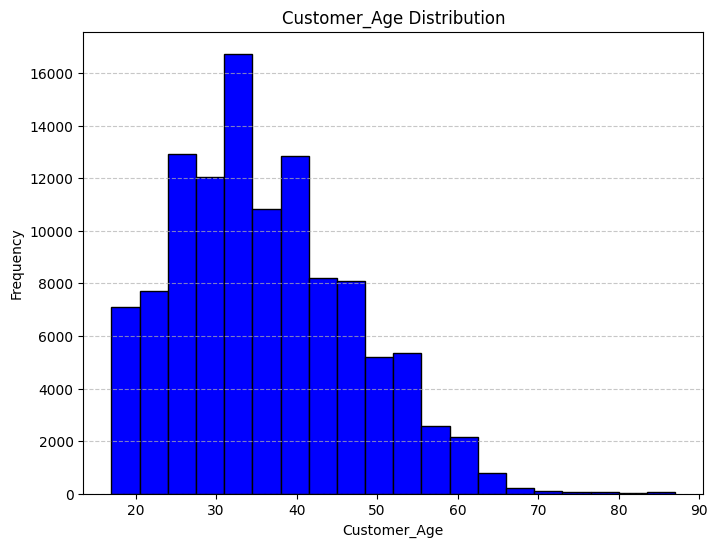

saved''{output_file}'


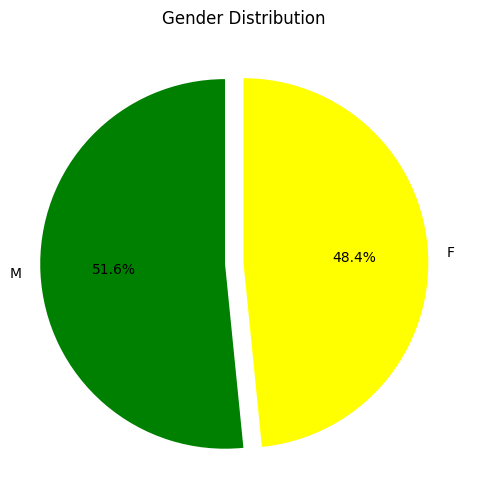

Age group revenue chart 'age_group_revenue.png


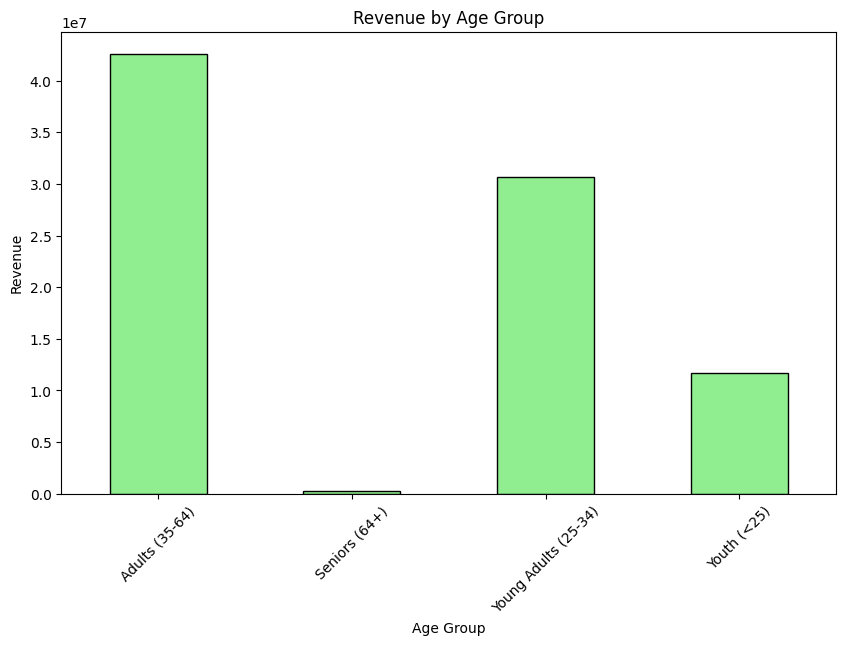

Product category profit product_category_profit.png


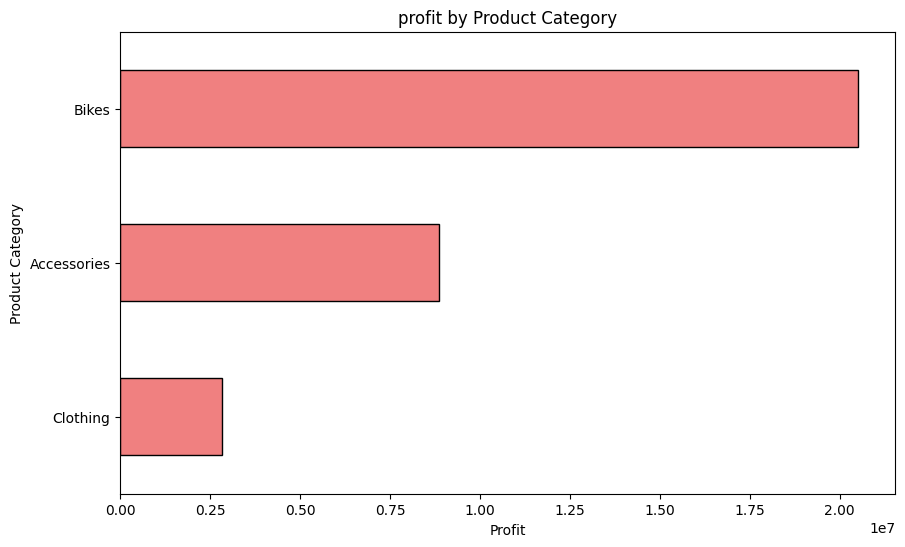

Profit margin scatter plot saved as 'profit_margin_scatter.png'.


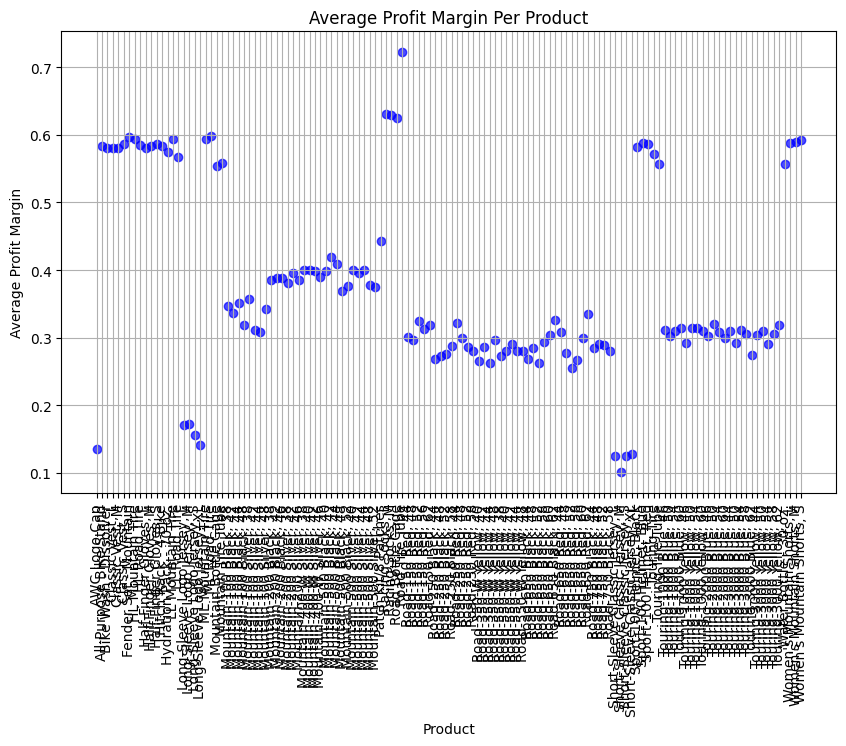

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_excel("C:/Users/Harihara Sudhan N/Downloads/sales_data.xlsx")

class DataPreprocessor:
    def Chech_null_value(self):
        print("Null Values:")
        print(df.isnull().sum())
    def duplicate(self):
        print("Duplicate")
        print(df.columns.duplicated())
    def Datatype(self):
        print("Dtype")
        for i in df.columns:
            dtype = df.dtypes[i]
            print(f"{i}{dtype}")
obj = DataPreprocessor()
obj.Chech_null_value()
obj.duplicate()
obj.Datatype()

class DataAnalyzer:
    def summary(self):
        summary_sts = df.describe()
        print("n\summary:")
        summary_sts.to_csv("Summary_statistics.csv")
    def unique_counts(self):
        product_category_count = df["Product_Category"].nunique()
        sub_category_count = df["Sub_Category"].nunique()
        product_count = df["Product"].nunique()  
        
    def plot_histogram(self, column, bins=20, output_file = "histogram.png"):
        if column not in df.columns:
            print(f"{column} Column not found in the datatset")
            return
        plt.figure(figsize=(8,6))
        plt.hist(df[column], bins=bins, color='blue', edgecolor='black')
        plt.title(f'{column} Distribution')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.savefig(output_file)
        print(f"Histogram saved as '{output_file}'.")
        plt.show()
analyzer = DataAnalyzer()
analyzer.summary()
analyzer.unique_counts()
analyzer.plot_histogram(column="Customer_Age", output_file="customer_age_histogram.png") 

class DataVisualizer:
    def gender_distribution(self, output_file="gender_distribution.png"):
        if "Customer_Gender" not in df.columns:
            print("Column 'Gender' not found")
            return
        gender_counts = df['Customer_Gender'].value_counts()

        plt.figure(figsize=(8,6))
        gender_counts.plot(kind='pie', autopct='%1.1f%%', colors=['green', 'yellow'], startangle= 90, explode=(0.1, 0))
        plt.title('Gender Distribution')
        plt.ylabel("")
        plt.savefig(output_file)
        print("saved''{output_file}'")
        plt.show()
    
    def age_group_revenue(self, output_file="age_group_revenue.png"):
        if 'Age_Group' not in df.columns or 'Revenue' not in df.columns:
            print("Columns not found")
            return
        age_group_revenue = df.groupby('Age_Group')["Revenue"].sum()

        plt.figure(figsize=(10,6))
        age_group_revenue.plot(kind='bar', color= 'lightgreen', edgecolor= 'black')
        plt.title("Revenue by Age Group")
        plt.xlabel("Age Group")
        plt.ylabel("Revenue")
        plt.xticks(rotation = 45)
        plt.savefig(output_file)
        print(f"Age group revenue chart '{output_file}")
        plt.show()

    def product_category_profit(self, output_file="product_category_profit.png"):
        if 'Product_Category'not in df.columns or "Profit" not in df.columns:
            print("Columns Product_Category or 'Profit' not found")
            return 
        category_profit = df.groupby('Product_Category')['Profit'].sum().sort_values()

        plt.figure(figsize=(10,6))
        category_profit.plot(kind='barh', color='lightcoral', edgecolor='black')
        plt.title("profit by Product Category")
        plt.xlabel("Profit")
        plt.ylabel("Product Category")
        plt.savefig(output_file)
        print(f"Product category profit {output_file}")
        plt.show() 

#     def revenue_profit(self, start_month, start_year, end_month, end_year, output_file = 'revenue_profit.png'):
#         if 'Date' not in df.columns or 'Revenue' not in df.columns or 'Profit' not in df.columns:
#             print("columns 'Date', 'Revenue', 'Profit' not found")
#             return
#         df['YearMonth'] = df['Date'].dt.to_period('M')
#         start_date = f"{start_year}-{start_month:02d}"
#         end_date = f"{end_year}-{end_month:02d}"
#         filter_df = df[(df['YearMonth']>= start_date) & (df['YearMonmth'] <= end_date)]
#         trends = filter_df.groupby('YearMonth')[['Revenue', 'Profit']].sum() 

#         plt.figure(figsize=(10, 6))
#         trends['Revenue'].plot(label='Revenue', marker='o', linestyle='-')
#         trends['Profit'].plot(label='Profit', marker='o', linestyle='--')
#         plt.title(f"Revenue and Profit Trends ({start_date} to {end_date})")
#         plt.xlabel("Month")
#         plt.ylabel("Amount")
#         plt.xticks(rotation=45)
#         plt.legend()
#         plt.grid(True)
#         plt.savefig(output_file)
#         print(f"Revenue and profit trends chart saved as '{output_file}'.")
#         plt.show()          

# start_month = int(input("Enter the start month (1-12): "))
# start_year = int(input("Enter the start year: "))
# end_month = int(input("Enter the end month (1-12): "))
# end_year = int(input("Enter the end year: "))   
    def profit_margin(self, output_file="profit_margin_scatter.png"):
        
        if 'Product' not in df.columns or 'Revenue' not in df.columns or 'Profit' not in df.columns:
            print("Columns 'Product', 'Revenue', or 'Profit' not found in the dataset.")
            return

        df['Profit_Margin'] = df['Profit'] / df['Revenue']

        product_profit_margin = df.groupby('Product')['Profit_Margin'].mean()

        plt.figure(figsize=(10, 6))
        plt.scatter(product_profit_margin.index, product_profit_margin.values, color='blue', alpha=0.7)
        plt.title("Average Profit Margin Per Product")
        plt.xlabel("Product")
        plt.ylabel("Average Profit Margin")
        plt.xticks(rotation=90)
        plt.grid(True)
        plt.savefig(output_file)
        print(f"Profit margin scatter plot saved as '{output_file}'.")
        plt.show()

visualizer = DataVisualizer()
visualizer.gender_distribution()
visualizer.age_group_revenue()
visualizer.product_category_profit()
#visualizer.revenue_profit(start_month, start_year, end_month, end_year)
visualizer.profit_margin()
